### <span style="color:green;">**Descrição da Base de Dados "Mall Customers"**</span>

A base de dados "Mall Customers" contém informações demográficas e comportamentais de clientes de um shopping. Este conjunto de dados é amplamente utilizado para análises de segmentação de clientes e inclui as seguintes colunas:

- **CustomerID**: Identificação única do cliente.
- **Gender**: Gênero do cliente (Masculino/Feminino).
- **Age**: Idade do cliente.
- **Annual Income (k$)**: Renda anual do cliente em milhares de dólares.
- **Spending Score (1-100)**: Pontuação de gastos do cliente atribuída pelo shopping, com base em comportamento e hábitos de compra.

#### Descrição do Trabalho

Neste projeto, usaremos a base de dados "Mall Customers" para explorar técnicas de redução de dimensionalidade e clustering. Aqui estão os passos que seguiremos:

1. **Preparação dos Dados**:
   - Carregar e visualizar a base de dados.
   - Limpar e padronizar os dados para garantir consistência e qualidade.

2. **Redução de Dimensionalidade com PCA**:
   - Aplicar Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos dados, facilitando a visualização e análise.

3. **Clustering com K-Means**:
   - Utilizar o algoritmo K-Means para agrupar os clientes em clusters com base em suas características demográficas e comportamentais.
   - Determinar o número ideal de clusters usando o método do cotovelo (Elbow Method).

4. **Visualização e Interpretação dos Resultados**:
   - Visualizar os clusters formados após a aplicação do K-Means e do PCA.
   - Interpretar os resultados e identificar padrões e insights sobre os diferentes segmentos de clientes.

5. **Aplicações Práticas**:
   - Explorar possíveis aplicações práticas dos resultados de clustering, como campanhas de marketing direcionadas e melhoria da experiência do cliente.

Este projeto permitirá que você aplique técnicas importantes de aprendizado de máquina, como PCA e K-Means, enquanto explora um conjunto de dados real e relevante. Vamos começar a jornada de análise e segmentação de clientes!


Link para a base de dados no Kaggle: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data

### **<span style="color:green">IMPORTS E CONFIGURAÇÕES</span>**

In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### **<span style="color:green">FUNÇÕES DE PROCESSAMENTO DE DADOS</span>**

In [60]:
CAMINHO_BASE_MALL_CUSTOMERS = "C:/Users/clayt/Projetos/IDP/ml-01/dados/mall_customer/mall_customers.csv"

In [61]:
def carregar_dados(path: str):
  dados = pd.read_csv(path)
  return dados

In [62]:
def obter_treino_e_teste(df: pd.DataFrame, perc_treino: float = 0.8):
    treino, teste = train_test_split(df, train_size=perc_treino ,random_state=42)
    return treino, teste  

In [63]:
def transformar_sex_em_inteiro(df: pd.DataFrame):
    df.Gender = df.Gender.map({'Male': 0, 'Female': 1})
    return df

### **<span style="color:green">OBTENHA E TRANSFORME OS DADOS</span>**

Carregar os dados dos clientes do shopping e transforme a coluna Gender de texto para número.

In [64]:
df = carregar_dados(path=CAMINHO_BASE_MALL_CUSTOMERS)
df = transformar_sex_em_inteiro(df=df)
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


Sempre verifique se existem dados nulos e os tipos dos dados!

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     200 non-null    int64
 1   Gender         200 non-null    int64
 2   Age            200 non-null    int64
 3   AnnualIncome   200 non-null    int64
 4   SpendingScore  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


### **<span style="color:green">PREPARE OS DADOS</span>**

In [66]:
# Selecionar apenas as características numéricas relevantes
features = df[['Age', 'AnnualIncome', 'SpendingScore', 'Gender']]

# Padronizar os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [67]:
# Reduzir a dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Criar um DataFrame com os componentes principais
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['CustomerID'] = df['CustomerID']


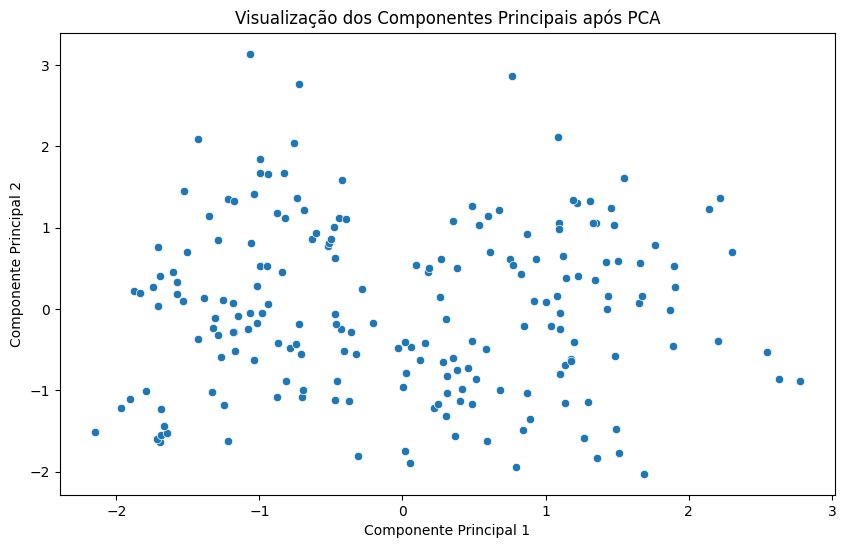

In [68]:
# Plotar os componentes principais
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('Visualização dos Componentes Principais após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


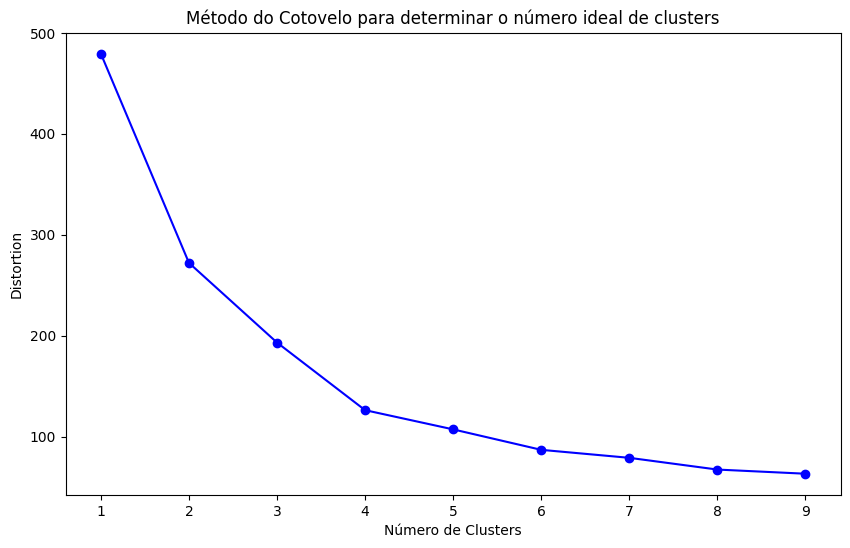

In [69]:
# Determinar o número ideal de clusters usando o Método do Cotovelo (Elbow Method)
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)
    distortions.append(kmeans.inertia_)

# Plotar o gráfico do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distortion')
plt.title('Método do Cotovelo para determinar o número ideal de clusters')
plt.show()


In [70]:
# Aplicar K-Means com o número ideal de clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(principal_components)

# Adicionar os clusters ao DataFrame
df_pca['Cluster'] = clusters


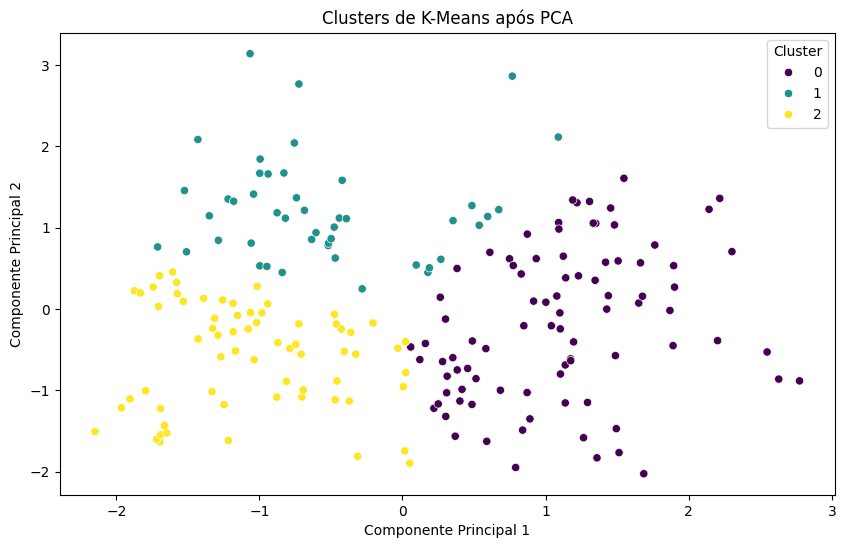

In [71]:
# Plotar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Clusters de K-Means após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [72]:
# Adicionar as características originais ao DataFrame de PCA
df_pca['Age'] = df['Age']
df_pca['AnnualIncome'] = df['AnnualIncome']
df_pca['SpendingScore'] = df['SpendingScore']

# Calcular estatísticas descritivas para cada cluster
cluster_stats = df_pca.groupby('Cluster').agg({
    'Age': ['min', 'max', 'mean'],
    'AnnualIncome': ['min', 'max', 'mean'],
    'SpendingScore': ['min', 'max', 'mean']
})



cluster_stats


Age                AnnualIncome                 SpendingScore      \
        min max       mean          min  max       mean           min max   
Cluster                                                                     
0        34  70  51.666667           18  120  57.252874             1  60   
1        18  45  30.282609           42  137  83.630435             5  97   
2        18  45  28.089552           15   88  49.014925             6  99   

                    
              mean  
Cluster             
0        33.436782  
1        61.021739  
2        64.537313

In [75]:
# Visualizar as estatísticas descritivas
for cluster in cluster_stats.index:
    print(f"Cluster {cluster}:")
    print(f"Idade: {cluster_stats.loc[cluster, ('Age', 'min')]} - {cluster_stats.loc[cluster, ('Age', 'max')]}")
    print(f"Renda Anual: {cluster_stats.loc[cluster, ('AnnualIncome', 'min')]}k$ - {cluster_stats.loc[cluster, ('AnnualIncome', 'max')]}k$")
    print(f"Pontuação de Gastos: {cluster_stats.loc[cluster, ('SpendingScore', 'min')]} - {cluster_stats.loc[cluster, ('SpendingScore', 'max')]}")
    print(f"Média de Idade: {cluster_stats.loc[cluster, ('Age', 'mean')]:.2f}")
    print(f"Média de Renda Anual: {cluster_stats.loc[cluster, ('AnnualIncome', 'mean')]:.2f}k$")
    print(f"Média de Pontuação de Gastos: {cluster_stats.loc[cluster, ('SpendingScore', 'mean')]:.2f}")
    print()


Cluster 0:
Idade: 34 - 70
Renda Anual: 18k$ - 120k$
Pontuação de Gastos: 1 - 60
Média de Idade: 51.67
Média de Renda Anual: 57.25k$
Média de Pontuação de Gastos: 33.44

Cluster 1:
Idade: 18 - 45
Renda Anual: 42k$ - 137k$
Pontuação de Gastos: 5 - 97
Média de Idade: 30.28
Média de Renda Anual: 83.63k$
Média de Pontuação de Gastos: 61.02

Cluster 2:
Idade: 18 - 45
Renda Anual: 15k$ - 88k$
Pontuação de Gastos: 6 - 99
Média de Idade: 28.09
Média de Renda Anual: 49.01k$
Média de Pontuação de Gastos: 64.54



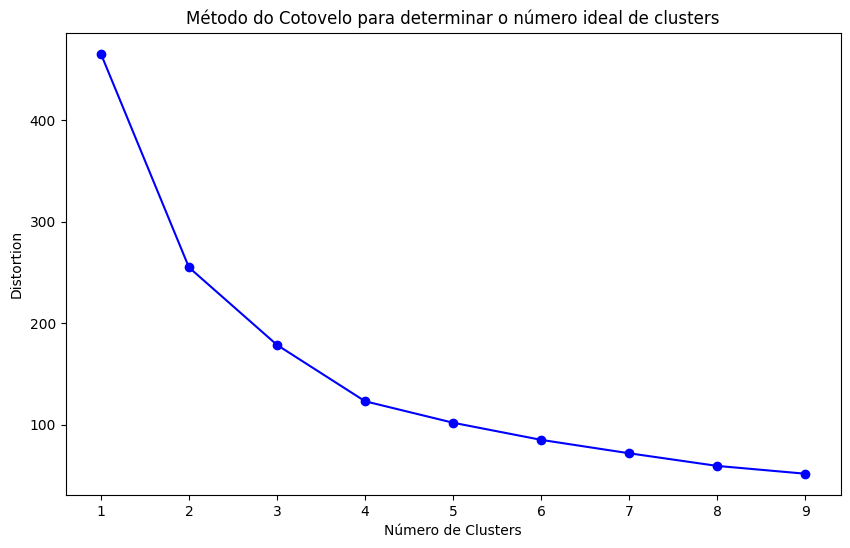

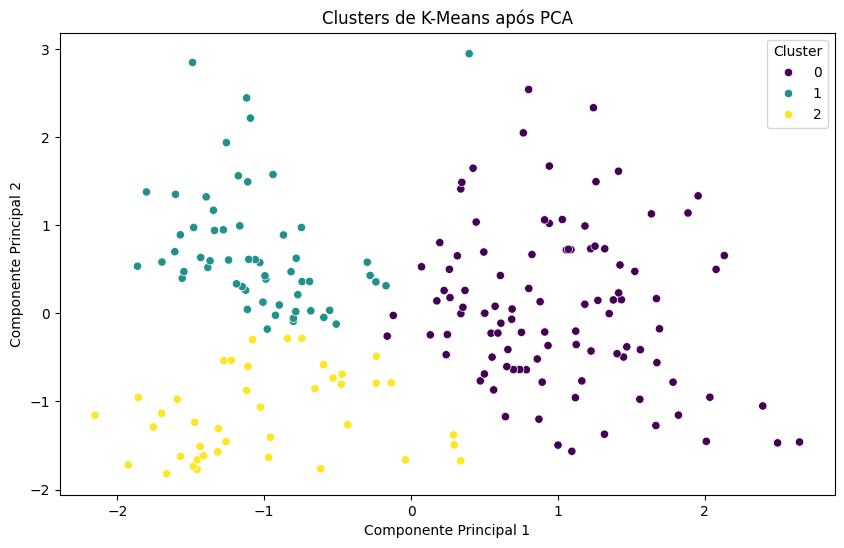

Cluster 0:
Porcentagem Feminina: 53.47%
Idade: 19 - 70
Renda Anual: 18k$ - 126k$
Pontuação de Gastos: 1 - 60
Média de Idade: 49.18
Média de Renda Anual: 60.86k$
Média de Pontuação de Gastos: 32.85

Cluster 1:
Porcentagem Feminina: 56.90%
Idade: 18 - 40
Renda Anual: 57k$ - 137k$
Pontuação de Gastos: 18 - 97
Média de Idade: 30.00
Média de Renda Anual: 80.41k$
Média de Pontuação de Gastos: 70.36

Cluster 2:
Porcentagem Feminina: 60.98%
Idade: 18 - 35
Renda Anual: 15k$ - 54k$
Pontuação de Gastos: 6 - 99
Média de Idade: 25.93
Média de Renda Anual: 31.73k$
Média de Pontuação de Gastos: 64.41



In [86]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados dos clientes do shopping
df = carregar_dados(CAMINHO_BASE_MALL_CUSTOMERS)

# Converter Gender para valores numéricos (0 para Masculino, 1 para Feminino)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Selecionar apenas as características numéricas relevantes
features = df[['Age', 'AnnualIncome', 'SpendingScore']]

# Padronizar os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Reduzir a dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Criar um DataFrame com os componentes principais
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['CustomerID'] = df['CustomerID']
df_pca['Age'] = df['Age']
df_pca['AnnualIncome'] = df['AnnualIncome']
df_pca['SpendingScore'] = df['SpendingScore']
df_pca['Gender'] = df['Gender']

# Determinar o número ideal de clusters usando o Método do Cotovelo (Elbow Method)
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(principal_components)
    distortions.append(kmeans.inertia_)

# Plotar o gráfico do Cotovelo
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Distortion')
plt.title('Método do Cotovelo para determinar o número ideal de clusters')
plt.show()

# Aplicar K-Means com o número ideal de clusters (supondo que seja 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(principal_components)

# Adicionar os clusters ao DataFrame
df_pca['Cluster'] = clusters

# Plotar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Clusters de K-Means após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Calcular estatísticas descritivas para cada cluster
cluster_stats = df_pca.groupby('Cluster').agg({
    'Gender': ['mean'],
    'Age': ['min', 'max', 'mean'],
    'AnnualIncome': ['min', 'max', 'mean'],
    'SpendingScore': ['min', 'max', 'mean']
})

# Visualizar as estatísticas descritivas
for cluster in cluster_stats.index:
    print(f"Cluster {cluster}:")
    print(f"Porcentagem Feminina: {cluster_stats.loc[cluster, ('Gender', 'mean')]*100:.2f}%")
    print(f"Idade: {cluster_stats.loc[cluster, ('Age', 'min')]} - {cluster_stats.loc[cluster, ('Age', 'max')]}")
    print(f"Renda Anual: {cluster_stats.loc[cluster, ('AnnualIncome', 'min')]}k$ - {cluster_stats.loc[cluster, ('AnnualIncome', 'max')]}k$")
    print(f"Pontuação de Gastos: {cluster_stats.loc[cluster, ('SpendingScore', 'min')]} - {cluster_stats.loc[cluster, ('SpendingScore', 'max')]}")
    print(f"Média de Idade: {cluster_stats.loc[cluster, ('Age', 'mean')]:.2f}")
    print(f"Média de Renda Anual: {cluster_stats.loc[cluster, ('AnnualIncome', 'mean')]:.2f}k$")
    print(f"Média de Pontuação de Gastos: {cluster_stats.loc[cluster, ('SpendingScore', 'mean')]:.2f}")
    print()
